In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [33]:
#Read CSV
merge_output = pd.read_csv("./zillow_census_m_OUTPUT.csv")


In [34]:
#Fill NaN with 0 (NaN values are for international migration. We are only interested in domestic migration)
merge_output = merge_output.fillna(0)

In [35]:
#Split County into two County and State columns
county_split = merge_output["County"].str.split(pat=', ', expand=True)
merge_output["State"] = county_split[1]
#filter for certain states
merge_output.set_index("County")

######SELECT STATES HERE#####
state_list = ['California', 'New York', 'Illinois', 'New Jersey']
merge_output = merge_output[merge_output["State"].isin(state_list)]

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State
5,5,"Adams County, Illinois",3830.0,-108.0,6557364,1683,99,1622.0,-392.0,3249582.0,...,3100,1300.0,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459,Illinois
15,15,"Alameda County, California",191112.0,-9506.0,1026152946,4284,714,94970.0,-6323.0,519927320.0,...,80700,43000.0,-3.242397,-7.187428,13.222112,24.939521,10.156663,12.895494,6.086341,California
17,17,"Albany County, New York",41278.0,4745.0,93033675,11340,315,20642.0,1833.0,46642755.0,...,2400,6200.0,-3.056112,-0.413437,-0.051894,1.505711,0.869565,1.217039,3.106212,New York
27,27,"Allegany County, New York",5200.0,2370.0,5623500,4140,345,2417.0,993.0,2771511.0,...,2300,2400.0,-0.337268,1.522843,5.833333,-5.354331,-0.499168,3.846154,3.864734,New York
33,33,"Alpine County, California",138.0,-42.0,4564,24,12,60.0,-35.0,2316.0,...,16500,56200.0,-15.294562,-7.445386,3.516378,2.000931,-5.337591,7.951807,25.089286,California


In [36]:
merge_output.columns

Index(['Unnamed: 0', 'County', '2009IN', '2009NET', '2009POP1YR', 'state',
       'county', '2010IN', '2010NET', '2010POP1YR', '2011IN', '2011NET',
       '2011POP1YR', '2012IN', '2012NET', '2012POP1YR', '2013IN', '2013NET',
       '2013POP1YR', '2014IN', '2014NET', '2014POP1YR', '2015IN', '2015NET',
       '2015POP1YR', 'County Code', '2009 Median Price', '2010 Median Price',
       '2011 Median Price', '2012 Median Price', '2013 Median Price',
       '2014 Median Price', '2015 Median Price', '2016 Median Price',
       '2010 Difference', '2011 Difference', '2012 Difference',
       '2013 Difference', '2014 Difference', '2015 Difference',
       '2016 Difference', '2010 Percent Change', '2011 Percent Change',
       '2012 Percent Change', '2013 Percent Change', '2014 Percent Change',
       '2015 Percent Change', '2016 Percent Change', 'State'],
      dtype='object')

In [37]:
#Create column that has net total migration/change in price
net_cols = []
dif_cols = []

years = ['2009','2010', '2011', '2012', '2013', '2014']
for year in years:
    year2 = str(int(year) + 1)

    net_cols.append(f"{year}NET")
    dif_cols.append(f"{year2} Median Price")

merge_output["TotalNET"] = merge_output[net_cols].sum(axis=1)
merge_output["Total Difference"] = merge_output[dif_cols].sum(axis=1)

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State,TotalNET,Total Difference
5,5,"Adams County, Illinois",3830.0,-108.0,6557364,1683,99,1622.0,-392.0,3249582.0,...,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459,Illinois,-5437.0,561300.0
15,15,"Alameda County, California",191112.0,-9506.0,1026152946,4284,714,94970.0,-6323.0,519927320.0,...,-3.242397,-7.187428,13.222112,24.939521,10.156663,12.895494,6.086341,California,-34763.0,3189400.0
17,17,"Albany County, New York",41278.0,4745.0,93033675,11340,315,20642.0,1833.0,46642755.0,...,-3.056112,-0.413437,-0.051894,1.505711,0.869565,1.217039,3.106212,New York,15006.0,1171100.0
27,27,"Allegany County, New York",5200.0,2370.0,5623500,4140,345,2417.0,993.0,2771511.0,...,-0.337268,1.522843,5.833333,-5.354331,-0.499168,3.846154,3.864734,New York,8372.0,364600.0
33,33,"Alpine County, California",138.0,-42.0,4564,24,12,60.0,-35.0,2316.0,...,-15.294562,-7.445386,3.516378,2.000931,-5.337591,7.951807,25.089286,California,-523.0,1297500.0


<Figure size 7200x4800 with 0 Axes>

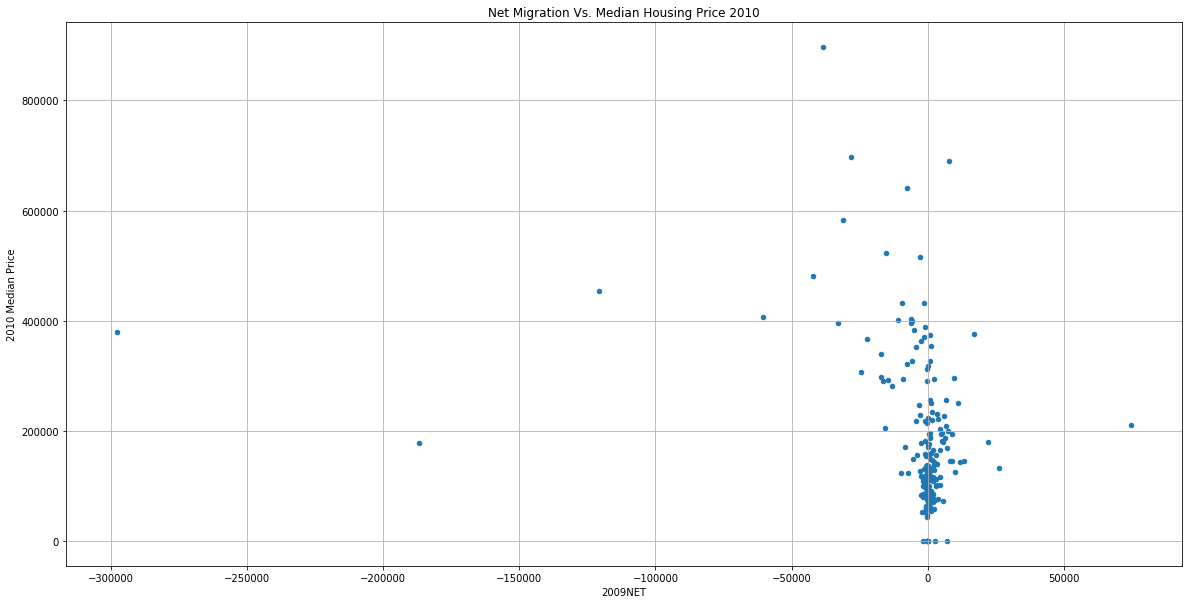

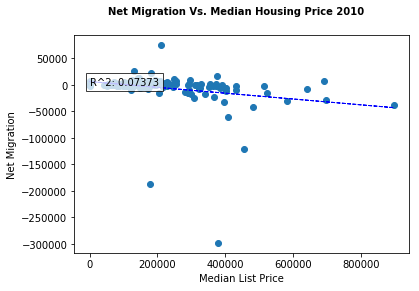

<Figure size 7200x4800 with 0 Axes>

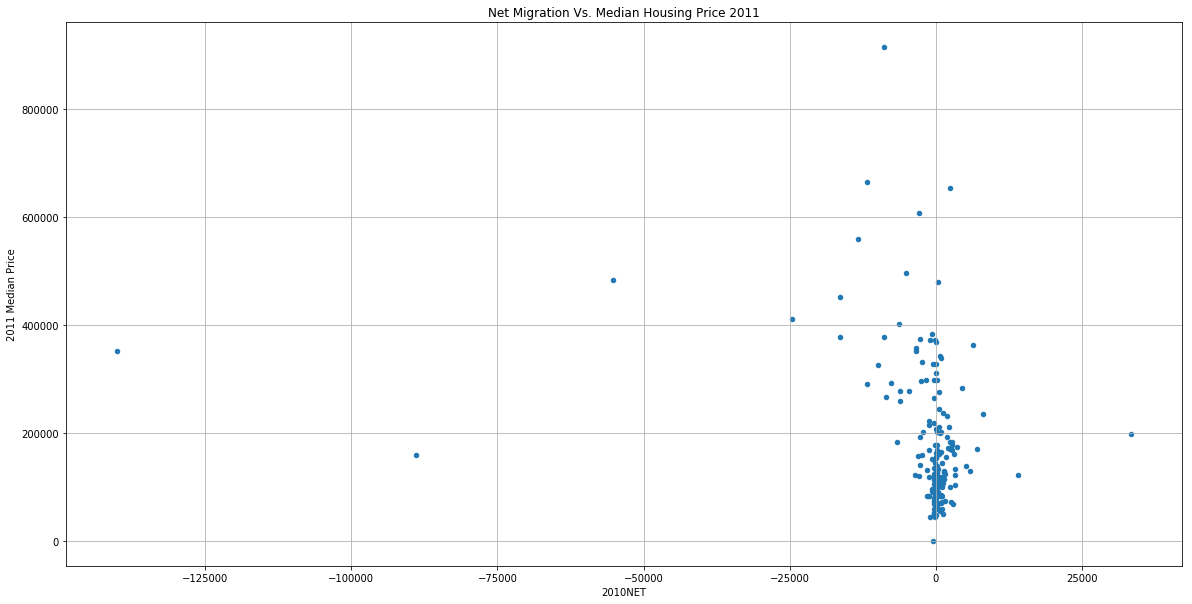

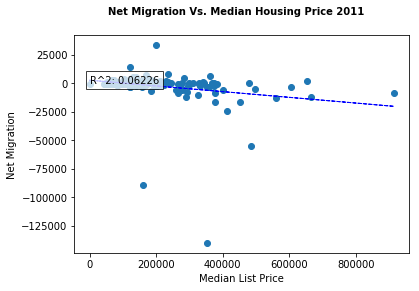

<Figure size 7200x4800 with 0 Axes>

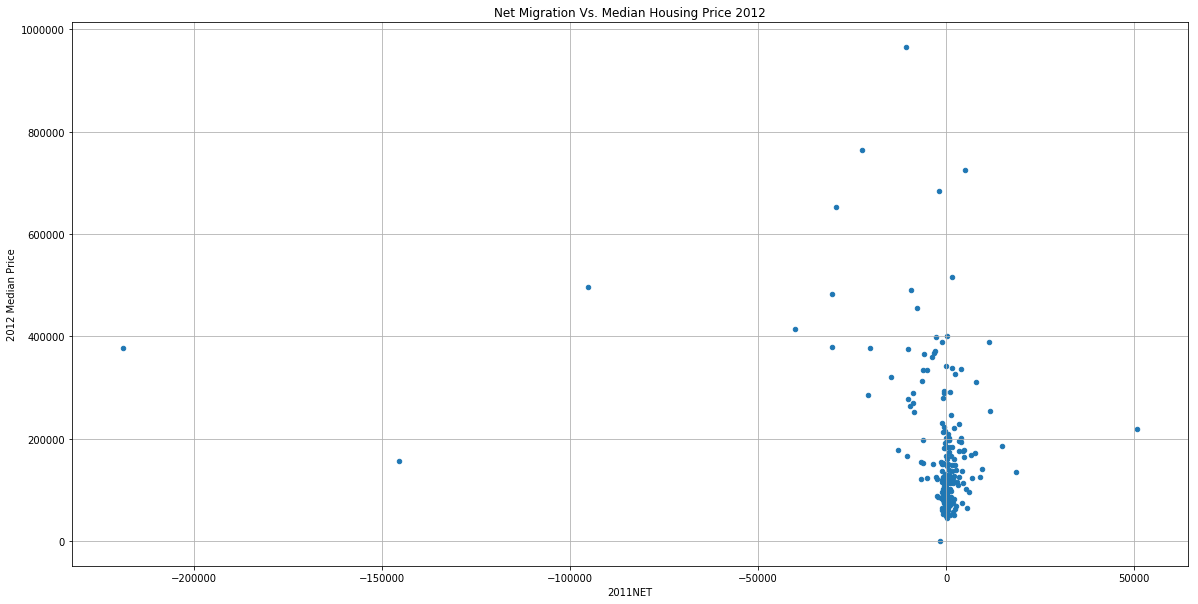

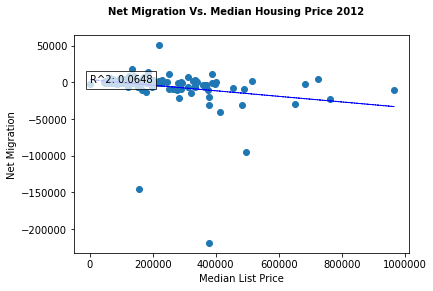

<Figure size 7200x4800 with 0 Axes>

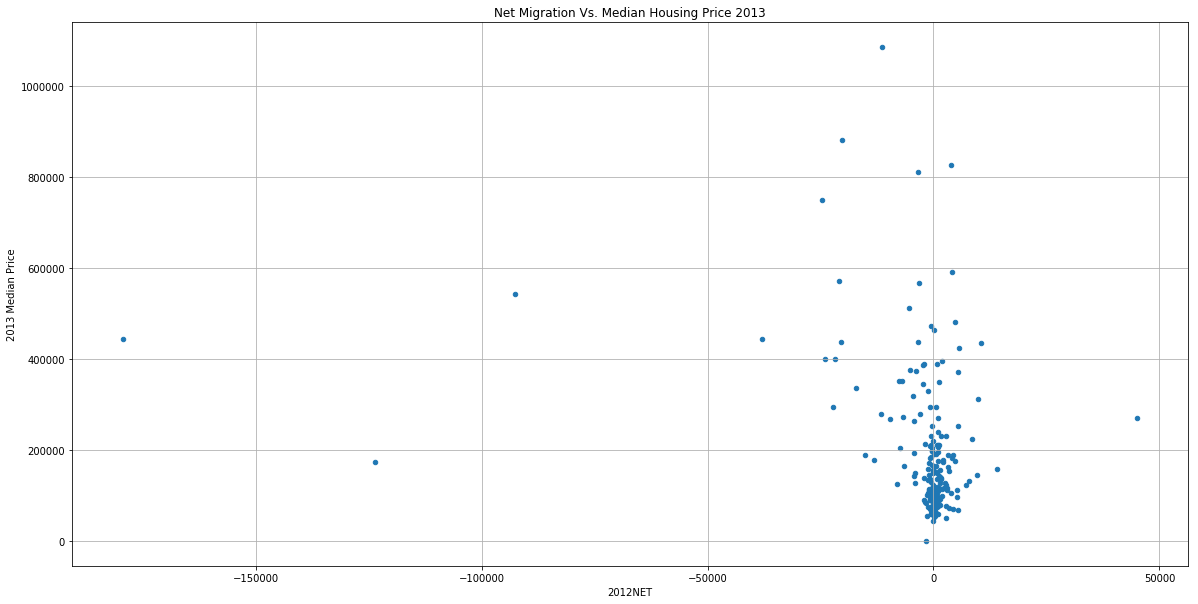

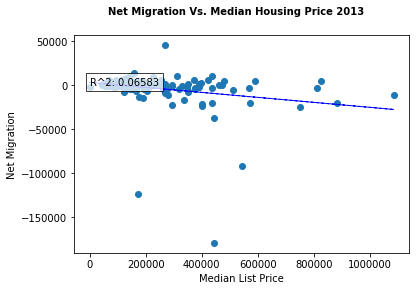

<Figure size 7200x4800 with 0 Axes>

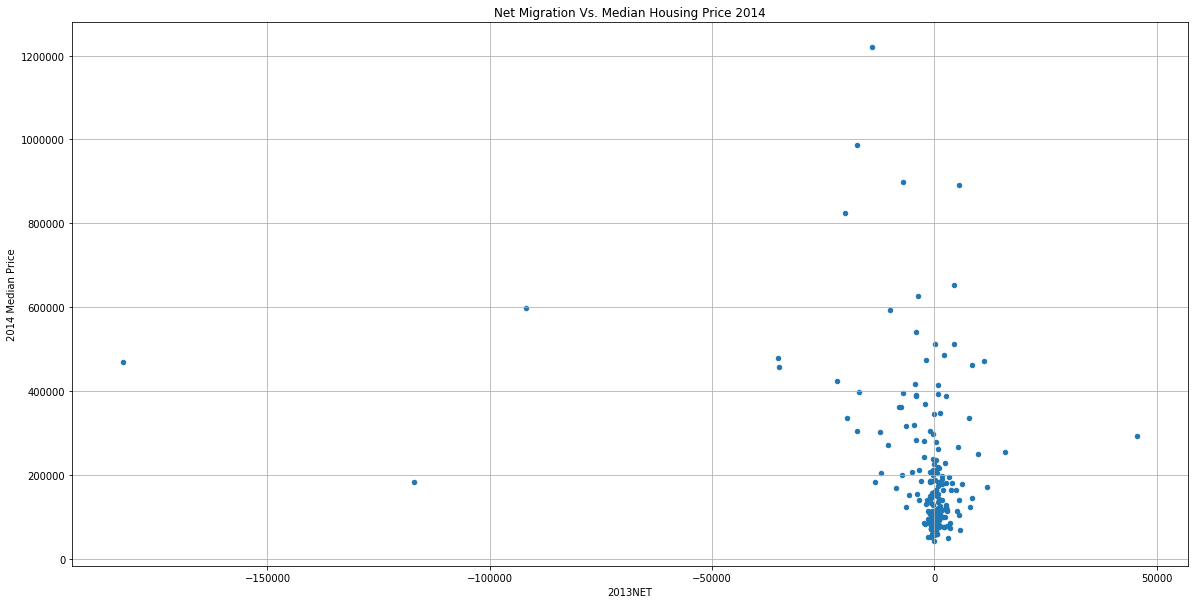

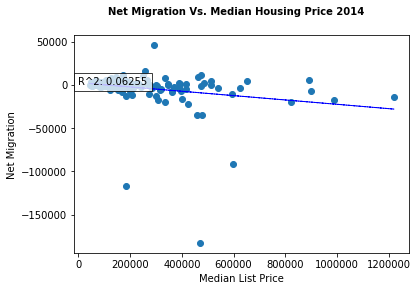

<Figure size 7200x4800 with 0 Axes>

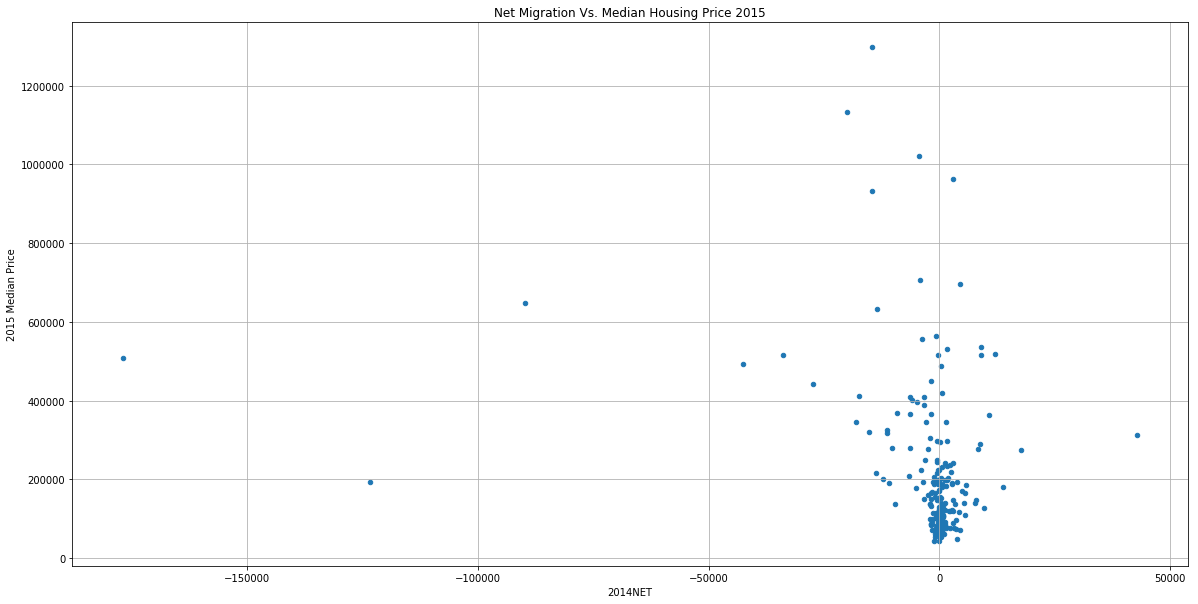

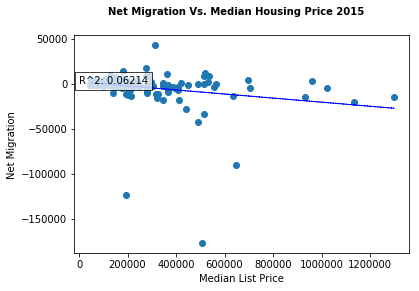

KeyError: 'Total Median Price'

<Figure size 7200x4800 with 0 Axes>

In [38]:
#Scatterplot compares year of census to year+1 of zillow. Also includes total
years = ['2009','2010', '2011', '2012', '2013', '2014', 'Total']

for year in years:
    #added try so we can include total in loop since you can't add 1 to a string, year2 used for zillow
    try:
         year2 = str(int(year) + 1)
    except: year2 = year
        
    plt.figure(dpi=1200)
   
    merge_output.plot(kind="scatter", x=f"{year}NET", 
                                              y=f"{year2} Median Price", 
                                              grid=True, figsize=(20,10),
                                              title=f"Net Migration Vs. Median Housing Price {year2}")
    
    median_price = merge_output[f"{year2} Median Price"]
    moved_net = merge_output[f"{year}NET"]
    
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(median_price, moved_net)
    vc_fit = vc_slope * median_price + vc_int

    fig, (ax1) = plt.subplots(1, sharex=True)
    fig.suptitle(f"Net Migration Vs. Median Housing Price {year2}", fontsize=10, fontweight="bold")

    plt.ylabel("Net Migration")
    plt.xlabel("Median List Price")
    #ax1.set_xlim(min(moved_net)-10000, max(moved_net)+10000)
    #ax1.set_ylim(min(difference)-10000, max(difference)+10000)
    ax1.plot(median_price, moved_net, linewidth=0, marker="o")
    ax1.plot(median_price, vc_fit, "b--", linewidth=1)
    plt.text(-5,-5,"R^2: "+str(round(vc_r**2,5)),bbox=dict(facecolor='white', alpha=0.75))
    
    plt.savefig(f"Net Negative Median Housing Price) {year2}.png",dpi = 1000)
    plt.show()